Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?


K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression.
It is one of the simplest and most intuitive ML algorithms.


KNN makes predictions using similarity:

You give a new data point (unknown label/output).

KNN looks at the K closest points from the training data.

It predicts based on those neighbors.

Distance is usually calculated using:

Euclidean distance (most common)

Manhattan distance

Minkowski distance

Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?


The Curse of Dimensionality refers to problems that arise when data has too many features (dimensions).
As dimensions increase, data becomes sparse, distance becomes less meaningful, and models like KNN suffer.


What is Curse of Dimensionality?

When the number of features (columns) increases:

Data becomes spread out

Samples become very sparse

Distance between points becomes less useful

Model accuracy drops

This happens because in high-dimensional space:

All points start to appear equally far from each other

Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features into new uncorrelated features called principal components — while keeping most of the important variance (information) of the data.

What PCA Does

✔ Reduces number of features
✔ Removes multicollinearity
✔ Converts correlated features → uncorrelated components
✔ Keeps maximum variance (important patterns)

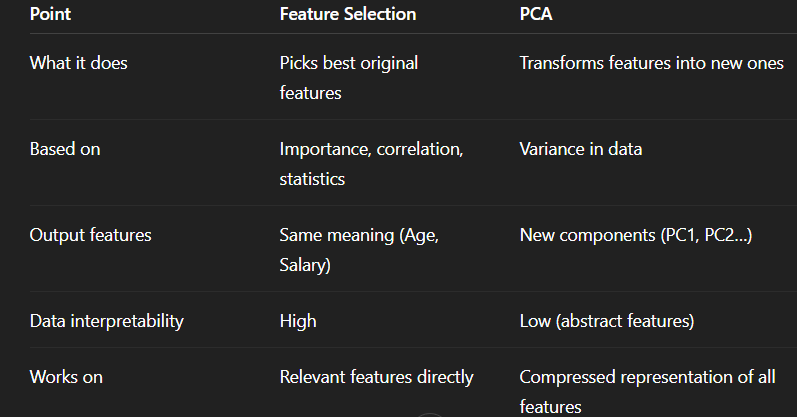


Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?


PCA uses linear algebra to identify the directions of maximum variance in the data — and this is where eigenvalues and eigenvectors come in.

What are Eigenvectors?

Eigenvectors are directions (axes) in which the data varies the most.

What are Eigenvalues?

Eigenvalues tell how much variance is captured by each eigenvector.

In simple words:

Eigenvalue = importance score of that principal component

Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?


KNN Weakness

KNN suffers from:

Curse of dimensionality

Performance drops when many features exist

Distance becomes less meaningful

High computation cost

KNN must compute distance to every point

More features = slower model

Correlated and irrelevant features harm accuracy

 How PCA Helps KNN

PCA reduces dimensions while keeping max information, which:

✔ Reduces overfitting

Less noise → smoother decision boundary

✔ Speeds up KNN

Fewer dimensions → fewer distance calculations

✔ Removes multicollinearity

PCA converts correlated variables into independent components

✔ Improves accuracy

Focus only on important variance directions

Idea Behind Combining Them

We apply:

PCA to compress data

KNN on reduced feature space

PCA acts as a feature engineering + noise removal step,
making KNN more accurate and faster.


Use the Wine Dataset from sklearn.datasets.load_wine().
Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 1️⃣ KNN WITHOUT SCALING
# -------------------------
knn_no_scale = KNeighborsClassifier(n_neighbors=5)
knn_no_scale.fit(X_train, y_train)
y_pred_no_scale = knn_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

# -------------------------
# 2️⃣ KNN WITH SCALING
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# -------------------------
# PRINT RESULTS
# -------------------------
print("KNN Accuracy WITHOUT scaling:", acc_no_scale)
print("KNN Accuracy WITH scaling:", acc_scaled)


KNN Accuracy WITHOUT scaling: 0.7222222222222222
KNN Accuracy WITH scaling: 0.9444444444444444


Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.



In [2]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import pandas as pd

# Load Dataset
wine = load_wine()
X = wine.data

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio of each component
for i, ratio in enumerate(explained_variance):
    print(f"PC{i+1}: {ratio:.4f}")

# Optional: cumulative variance
cumulative_variance = explained_variance.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_variance)


PC1: 0.9981
PC2: 0.0017
PC3: 0.0001
PC4: 0.0001
PC5: 0.0000
PC6: 0.0000
PC7: 0.0000
PC8: 0.0000
PC9: 0.0000
PC10: 0.0000
PC11: 0.0000
PC12: 0.0000
PC13: 0.0000

Cumulative Explained Variance:
[0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]


Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.


In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load data
wine = load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------- Train on Original Data --------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
original_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

# -------- Apply PCA (Top 2 Components) --------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
pca_acc = accuracy_score(y_test, knn_pca.predict(X_test_pca))

# -------- Print Results --------
print("KNN Accuracy on Original Data:", original_acc)
print("KNN Accuracy on PCA (2 components):", pca_acc)


KNN Accuracy on Original Data: 0.9722222222222222
KNN Accuracy on PCA (2 components): 0.9166666666666666


Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.


In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- KNN using Euclidean distance (default) ---------
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
euclidean_acc = accuracy_score(y_test, knn_euclidean.predict(X_test_scaled))

# --------- KNN using Manhattan distance ---------
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
manhattan_acc = accuracy_score(y_test, knn_manhattan.predict(X_test_scaled))

# Print Results
print("KNN Accuracy (Euclidean):", euclidean_acc)
print("KNN Accuracy (Manhattan):", manhattan_acc)


KNN Accuracy (Euclidean): 0.9722222222222222
KNN Accuracy (Manhattan): 1.0


Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data


1. Use PCA to Reduce Dimensionality

Gene expression data has thousands of features.

PCA converts them into fewer principal components that capture most variance.

Removes noise & redundancy.

2. How Many Components to Keep?

Use explained variance ratio.

Keep components that capture 90–95% variance.

Example: Reduce from 10,000 features → 30 components.

3. KNN After PCA

KNN works well when:

Features are reduced

Noise is removed

We scale data → apply PCA → train KNN.

4. Model Evaluation

Use Stratified k-fold cross validation because data is small.

Measure Accuracy, F1-score, ROC-AUC.

5. Why This Pipeline Works (Stakeholder View)

PCA prevents overfitting and focuses on meaningful gene patterns.

KNN is simple, transparent, and easy to explain.

Cross-validation ensures reliable results.

Overall, this makes the model:

Robust

Interpretable

Suitable for real-world biomedical data